<a href="https://colab.research.google.com/github/rachelrios/DataSci/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

**Chapter 6 – Decision Trees - Rachel Rios
**

In [162]:
#SET UPS
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix,mean_absolute_error, classification_report,roc_auc_score, mean_squared_error


In [163]:
'''
Function that defines column "Penguin Outcome" based on species
@params: Takes in each row as parameters
@returns: A numerical value for species: Adelie 1, Gentoo 2, Chinstrap 3
'''
def penguinx(row): 
   if row['species'] == "Adelie":
      return 1
   if row['species'] == "Gentoo":
      return 2
   if row['species'] == "Chintrap" :
      return 3
   return 0


In [164]:
# INTENT: Load Penguin data

from sklearn.tree import DecisionTreeClassifier
import pandas as pd
# https://raw.githubusercontent.com/rachelrios/DataSci/main/penguins_size.csv
#We uploaded it to the web to allow the file to be independent of system / other files
#Problem 1
print("Problem 1.1: load the Excel (”raw data” worksheet) data into Pandas dataframe")
penguins = pd.read_csv('https://raw.githubusercontent.com/rachelrios/DataSci/main/penguins_size.csv') #Read file for penguins
penguins = penguins.dropna() #Delete bad data with NANS

#drop unused columns: Island & Sex
penguins = penguins.drop(["island","sex"], axis=1) #drop extra columns in pandas
print("========Penguins========") # view
print(penguins) #  x [species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g]
#Assign a number to each of the penguin species: Adelie 1, Gentoo 2, Chinstrap 3
#Call function and run new penguin type
penguins['penguin'] = penguins.apply (lambda row: penguinx(row), axis=1) #Apply lambda function on entire data frame

def penguin_tree(penguins):
  print("========Info on Penguins========") # view
  #Analyse data set
  print(penguins.describe())
  print("======== Data frame with New penguin column ========")
  print(penguins) #Print Updated dataframe
  #define X and Y
  X = penguins.iloc[:,1:-1].values #extract last all but last value
  print("========X========") 
  print(X)
  y = penguins['penguin']
  print("========y========") # view 
  print(y)
  ##BEFORE WE APPLY the fit we will split 50/50 the training data set
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50) #Split test 50/50 
  print("========Train Sets========") 
  print(X_train,y_train)
  y = penguins['penguin']
  print("========Test Sets========") # view 
  print(X_test,y_test)
  # # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
  # # Use gini measure; tree depth 2
  tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) # definition
  # # Apply the CART (classification and regression tree) algorithm 
  tree_clf.fit(X_train, y_train)
  print("========Precited Values========") # view 
  #Precict the values for the penguins using testing data set
  y_pred=tree_clf.predict(X_test)
  print(y_pred)
  #Run accuracy matrix
  print("========Confusion Matrix========") # view 
  ##Source for code below is from is from sample assigment 1 in blackboard
  cf_1=confusion_matrix(y_test, y_pred)
  TP = cf_1[1][1]  #TP - true positives
  FP = cf_1[0][1]  #FP - false positives
  TN = cf_1[0][0]  #TN - true negativess
  FN = cf_1[1][0]  #FN - false negatives
  TPR = round((TP/(TP + FN)) * 100, 2) #TPR = TP/(TP + FN)
  TNR = round((TN/(TN + FP)) * 100, 2) #TNR = TN/(TN + FP)
  ACC = round(((TP + TN)/(TP + TN + FP + FN)) * 100, 2)
  print("TP,FP,TN,FN,TPR,TNR,ACC")
  print(TP,FP,TN,FN,TPR,TNR,ACC)
  # Error rate
  error_rate = np.mean(y_pred != y_test )
  print(f'Error Rate: {error_rate}')
penguin_tree(penguins)


Problem 1.1: load the Excel (”raw data” worksheet) data into Pandas dataframe
========Penguins========
    species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0    Adelie              39.1             18.7              181.0       3750.0
1    Adelie              39.5             17.4              186.0       3800.0
2    Adelie              40.3             18.0              195.0       3250.0
4    Adelie              36.7             19.3              193.0       3450.0
5    Adelie              39.3             20.6              190.0       3650.0
..      ...               ...              ...                ...          ...
338  Gentoo              47.2             13.7              214.0       4925.0
340  Gentoo              46.8             14.3              215.0       4850.0
341  Gentoo              50.4             15.7              222.0       5750.0
342  Gentoo              45.2             14.8              212.0       5200.0
343  Gentoo              49.

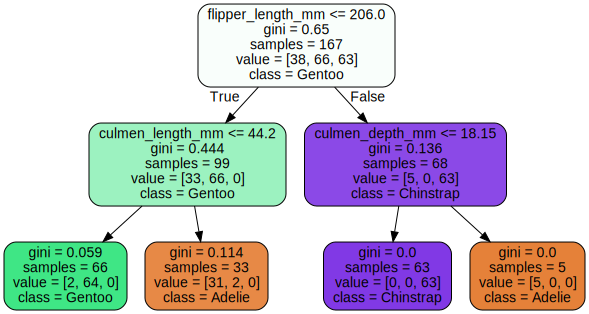

In [165]:
# INTENT: tree_clf visualized

from graphviz import Source # "Graphical visualization"
from sklearn.tree import export_graphviz

# create the decision tree as "pengu.dot"
export_graphviz( 
        tree_clf, # the tree object
        out_file=os.path.join(IMAGES_PATH, "pengu.dot"),
        feature_names = ["culmen_length_mm", "culmen_depth_mm",  "flipper_length_mm","body_mass_g"],
        class_names = ["Adelie","Gentoo","Chinstrap"],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "pengu.dot"))  # display


# Predicting classes and class probabilities

In [166]:
# INTENT: Example of classification by the decision tree
#Probable class that a pengiun with the following measurements is either adelie 0, gentoo 2, chinstrap 3 
#culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
tree_clf.predict_proba([[ 39.1 , 18.7 , 181. , 3750.]]) # probabilities of belonging to classes 0, 1, and 2

array([[0.03030303, 0.96969697, 0.        ]])

In [167]:
# classes that penguin with  
#culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g 
#39.1 , 18.7 , 181. , 3750. belongs to
tree_clf.predict([[ 39.1 , 18.7 , 181. , 3750.]]) 
#Most likely Gentoo

array([1])

# Sensitivity to training set details

In [168]:
#We modify the dataset by adding random numbers/noise to the dataset
penguins
x = pd.DataFrame(np.random.random((100,1)))
x['species'] = 'Adelie'
x['culmen_length_mm'] = penguins.culmen_length_mm[penguins['species'] == 'Adelie'].min()
x['culmen_depth_mm'] =  penguins.culmen_depth_mm[penguins['species'] == 'Adelie'].min()
x['flipper_length_mm'] =  penguins.flipper_length_mm[penguins['species'] == 'Adelie'].min()
x['body_mass_g'] = penguins.body_mass_g[penguins['species'] == 'Adelie'].min()
x['penguin'] = 1
x = x.drop([0], axis=1) #drop helper columns in pandas
both = pd.concat([penguins,x])
both
#rerun the tree predictions
penguin_tree(both)

========Info on Penguins========
       culmen_length_mm  culmen_depth_mm  ...  body_mass_g     penguin
count        434.000000       434.000000  ...   434.000000  434.000000
mean          41.253687        16.777880  ...  3895.910138    1.119816
std            6.933674         1.862346  ...   909.088846    0.647913
min           32.100000        13.100000  ...  2700.000000    0.000000
25%           35.000000        15.500000  ...  3000.000000    1.000000
50%           41.100000        16.350000  ...  3750.000000    1.000000
75%           46.875000        18.400000  ...  4600.000000    2.000000
max           59.600000        21.500000  ...  6300.000000    2.000000

[8 rows x 5 columns]
======== Data frame with New penguin column ========
   species  culmen_length_mm  ...  body_mass_g  penguin
0   Adelie              39.1  ...       3750.0        1
1   Adelie              39.5  ...       3800.0        1
2   Adelie              40.3  ...       3250.0        1
4   Adelie              36.7 

In [169]:
#We modify the dataset by adding wrong penguins
x = pd.DataFrame(np.random.random((100,1)))
x['species'] = 'Adelie'
x['culmen_length_mm'] = penguins.culmen_length_mm[penguins['species'] == 'Gentoo'].min()
x['culmen_depth_mm'] =  penguins.culmen_depth_mm[penguins['species'] == 'Adelie'].min()
x['flipper_length_mm'] =  penguins.flipper_length_mm[penguins['species'] == 'Chinstrap'].min()
x['body_mass_g'] = penguins.body_mass_g[penguins['species'] == 'Adelie'].max()
x['penguin'] = 2
x = x.drop([0], axis=1) #drop helper columns in pandas
both = pd.concat([penguins,x])
both
#rerun the tree predictions
penguin_tree(both)

========Info on Penguins========
       culmen_length_mm  culmen_depth_mm  ...  body_mass_g    penguin
count        434.000000       434.000000  ...   434.000000  434.00000
mean          43.281336        16.777880  ...  4339.458525    1.35023
std            4.963148         1.862346  ...   745.043123    0.73633
min           32.100000        13.100000  ...  2700.000000    0.00000
25%           40.725000        15.500000  ...  3700.000000    1.00000
50%           41.100000        16.350000  ...  4462.500000    2.00000
75%           46.875000        18.400000  ...  4775.000000    2.00000
max           59.600000        21.500000  ...  6300.000000    2.00000

[8 rows x 5 columns]
======== Data frame with New penguin column ========
   species  culmen_length_mm  ...  body_mass_g  penguin
0   Adelie              39.1  ...       3750.0        1
1   Adelie              39.5  ...       3800.0        1
2   Adelie              40.3  ...       3250.0        1
4   Adelie              36.7  ...     

**References:**

[1] Lecture Notes & Sample assigment

[2] Géron, A., 2021. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. [online] O’Reilly Online Learning. Available at: <https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/> [Accessed 8 March 2021].

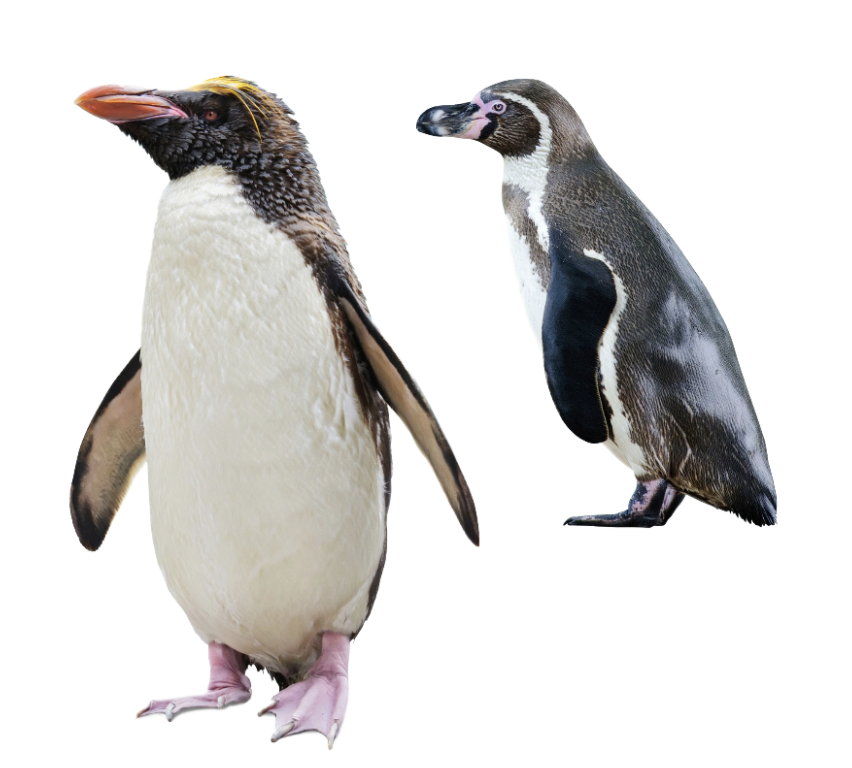